# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

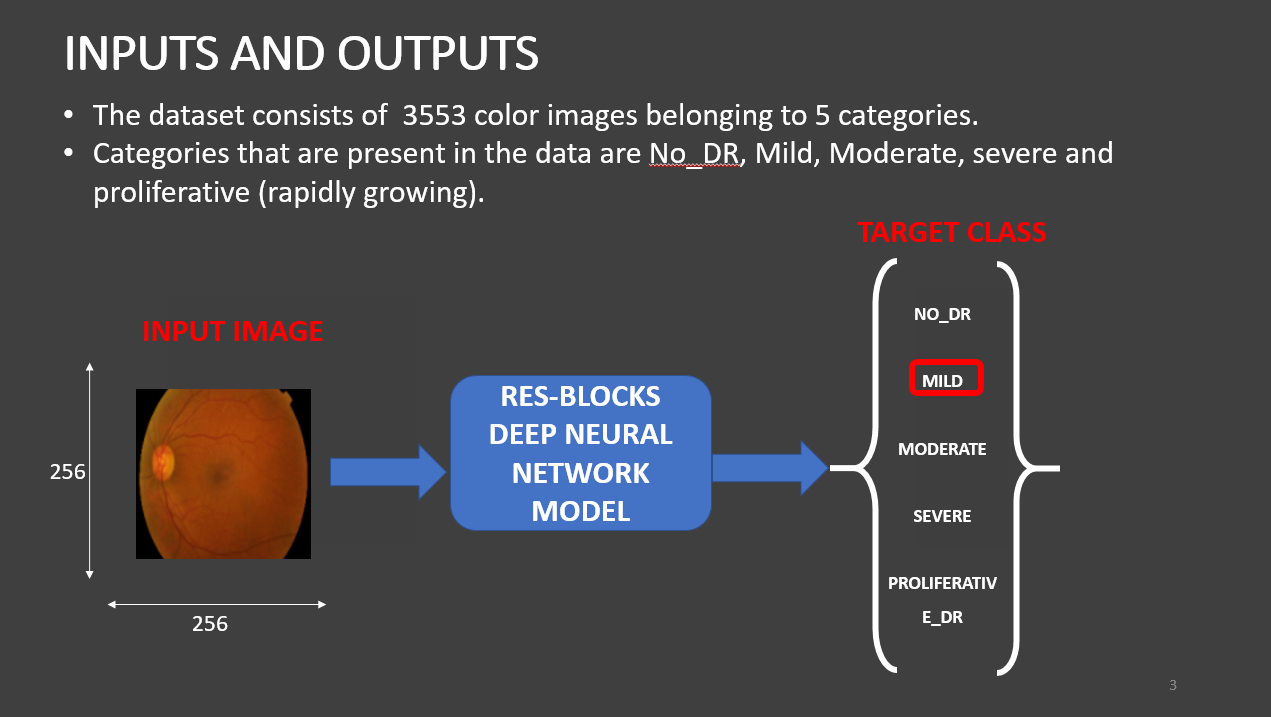

# TASK #2: IMPORT LIBRARIES/DATASETS

In [1]:
# Import the necessary packages

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
import matplotlib.pyplot as plt
import PIL

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from IPython.display import display
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler


In [ ]:
import seaborn as sns

In [ ]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 

In [4]:
os.listdir('./train')

['Mild', 'Moderate', 'No_DR', 'Proliferative_DR', 'Severe']

In [5]:
os.listdir(os.path.join('train', 'Mild'))

['10030_left.png',
 '10030_right.png',
 '10085_left.png',
 '10085_right.png',
 '10150_right.png',
 '10169_right.png',
 '10177_left.png',
 '10177_right.png',
 '1020_left.png',
 '1020_right.png',
 '10220_left.png',
 '10221_right.png',
 '10232_right.png',
 '10233_left.png',
 '10233_right.png',
 '10234_left.png',
 '10234_right.png',
 '10269_left.png',
 '1027_left.png',
 '10297_right.png',
 '10320_right.png',
 '10334_left.png',
 '10356_right.png',
 '1036_left.png',
 '1036_right.png',
 '10384_left.png',
 '10426_left.png',
 '1043_left.png',
 '10468_right.png',
 '10545_right.png',
 '10551_left.png',
 '10551_right.png',
 '10567_right.png',
 '10594_right.png',
 '10657_left.png',
 '10657_right.png',
 '10672_left.png',
 '10672_right.png',
 '10737_right.png',
 '10758_left.png',
 '10758_right.png',
 '10762_left.png',
 '1077_left.png',
 '1077_right.png',
 '10787_left.png',
 '10787_right.png',
 '10790_right.png',
 '10808_left.png',
 '10812_left.png',
 '10822_left.png',
 '10822_right.png',
 '10853_left

In [6]:
# Check the number of images in the dataset
train = []
label = []

# os.listdir returns the list of files in the folder, in this case image class names
for i in os.listdir('./train'):
  train_class = os.listdir(os.path.join('train', i))
  for j in train_class:
    img = os.path.join('train', i, j)
    train.append(img)
    label.append(i)

print('Number of train images : {} \n'.format(len(train)))


Number of train images : 3350 



In [7]:
train

['train\\Mild\\10030_left.png',
 'train\\Mild\\10030_right.png',
 'train\\Mild\\10085_left.png',
 'train\\Mild\\10085_right.png',
 'train\\Mild\\10150_right.png',
 'train\\Mild\\10169_right.png',
 'train\\Mild\\10177_left.png',
 'train\\Mild\\10177_right.png',
 'train\\Mild\\1020_left.png',
 'train\\Mild\\1020_right.png',
 'train\\Mild\\10220_left.png',
 'train\\Mild\\10221_right.png',
 'train\\Mild\\10232_right.png',
 'train\\Mild\\10233_left.png',
 'train\\Mild\\10233_right.png',
 'train\\Mild\\10234_left.png',
 'train\\Mild\\10234_right.png',
 'train\\Mild\\10269_left.png',
 'train\\Mild\\1027_left.png',
 'train\\Mild\\10297_right.png',
 'train\\Mild\\10320_right.png',
 'train\\Mild\\10334_left.png',
 'train\\Mild\\10356_right.png',
 'train\\Mild\\1036_left.png',
 'train\\Mild\\1036_right.png',
 'train\\Mild\\10384_left.png',
 'train\\Mild\\10426_left.png',
 'train\\Mild\\1043_left.png',
 'train\\Mild\\10468_right.png',
 'train\\Mild\\10545_right.png',
 'train\\Mild\\10551_left.png'

In [8]:
label

['Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 'Mild',
 

MINI CHALLENGE #1: 
- Print out the count plot for all classes using Seaborn (External Research is Required)
sns.countplot(label)

# TASK #3: PERFORM DATA EXPLORATION AND DATA VISUALIZATION

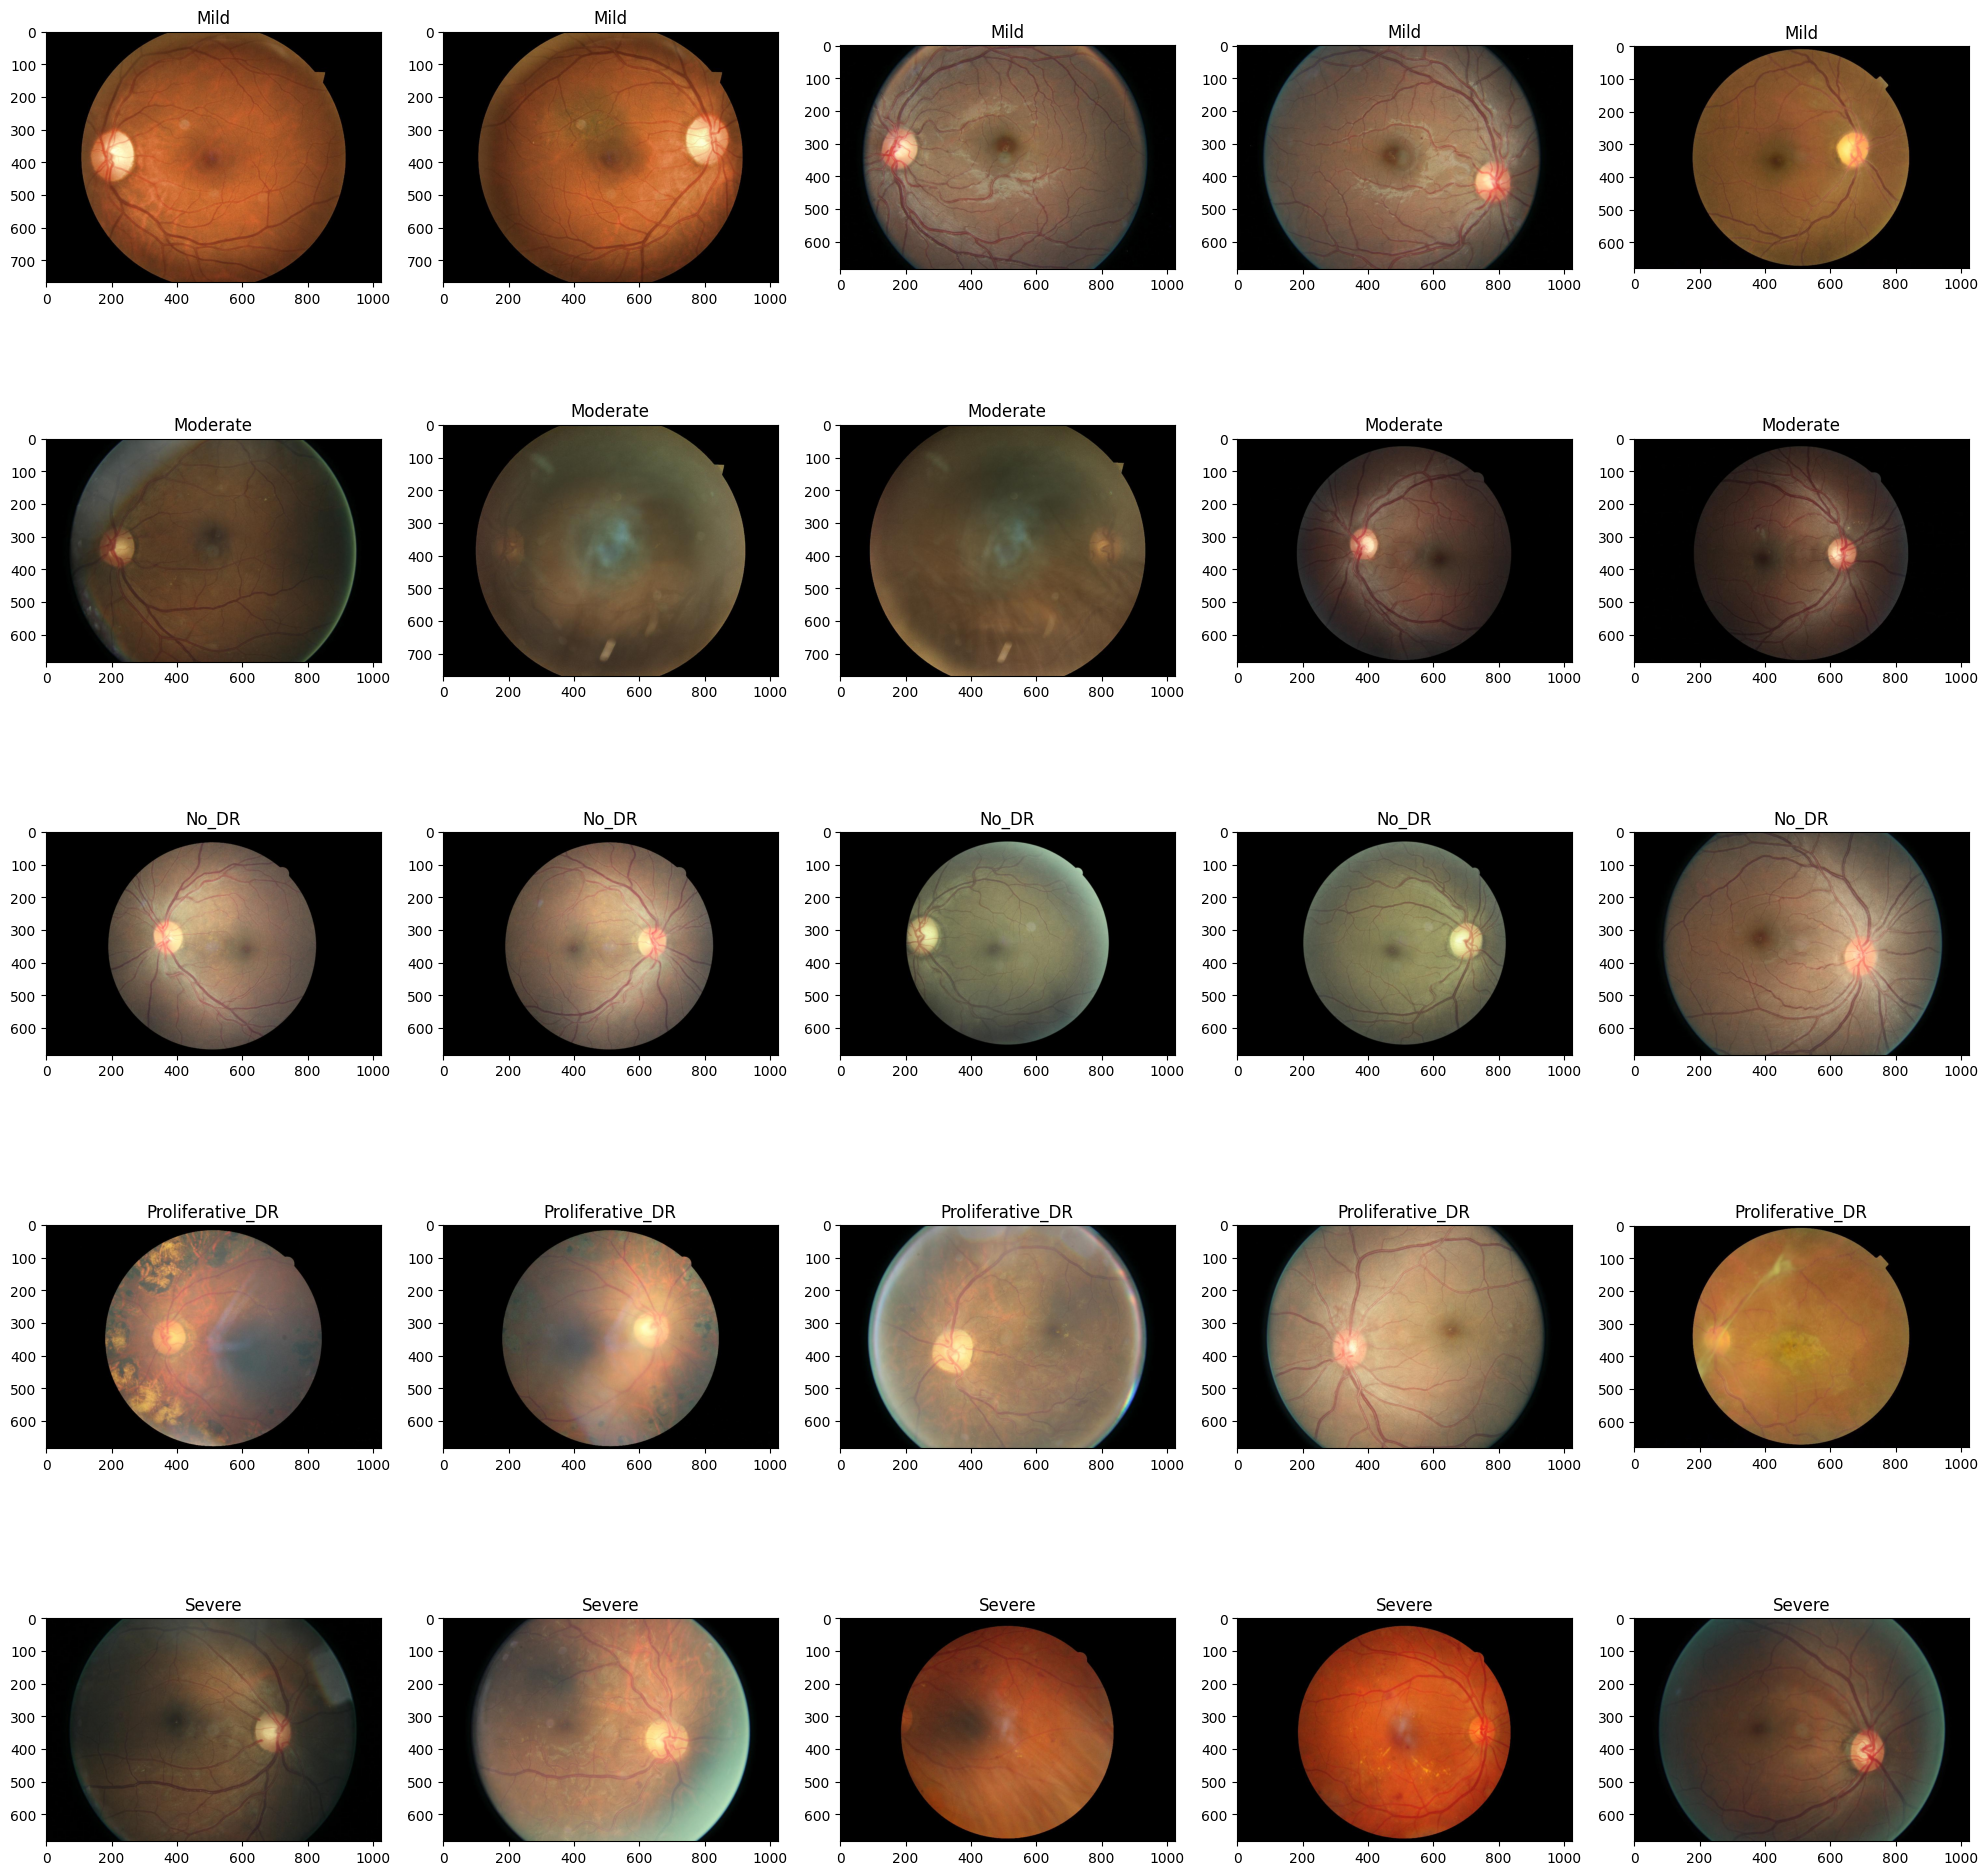

In [9]:
# Visualize 5 images for each class in the dataset

fig, axs = plt.subplots(5, 5, figsize = (20, 20))
count = 0
for i in os.listdir('./train'):
  # get the list of images in a given class
  train_class = os.listdir(os.path.join('train', i))
  # plot 5 images per class
  for j in range(5):
    img = os.path.join('train', i, train_class[j])
    img = PIL.Image.open(img)
    axs[count][j].title.set_text(i)
    axs[count][j].imshow(img)  
  count += 1

fig.tight_layout()


In [10]:
# check the number of images in each class in the training dataset

No_images_per_class = []
Class_name = []
for i in os.listdir('./train'):
  train_class = os.listdir(os.path.join('train', i))
  No_images_per_class.append(len(train_class))
  Class_name.append(i)
  print('Number of images in {} = {} \n'.format(i, len(train_class)))

Number of images in Mild = 236 

Number of images in Moderate = 540 

Number of images in No_DR = 2426 

Number of images in Proliferative_DR = 63 

Number of images in Severe = 85 



In [11]:
retina_df = pd.DataFrame({'Image': train,'Labels': label})

retina_df

Image  Labels
0        train\Mild\10030_left.png    Mild
1       train\Mild\10030_right.png    Mild
2        train\Mild\10085_left.png    Mild
3       train\Mild\10085_right.png    Mild
4       train\Mild\10150_right.png    Mild
...                            ...     ...
3345   train\Severe\1350_right.png  Severe
3346  train\Severe\13591_right.png  Severe
3347  train\Severe\13684_right.png  Severe
3348   train\Severe\13716_left.png  Severe
3349  train\Severe\13716_right.png  Severe

[3350 rows x 2 columns]

# TASK #4: PERFORM DATA AUGMENTATION AND CREATE DATA GENERATOR

In [12]:
# Shuffle the data and split it into training and testing
retina_df = shuffle(retina_df)
train, test = train_test_split(retina_df, test_size = 0.2)

In [13]:
# Create run-time augmentation on training and test dataset
# For training datagenerator, we add normalization, shear angle, zooming range and horizontal flip
train_datagen = ImageDataGenerator(
        rescale = 1./255,
        shear_range = 0.2,
        validation_split = 0.15)

# For test datagenerator, we only normalize the data.
test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
# Creating datagenerator for training, validation and test dataset.

train_generator = train_datagen.flow_from_dataframe(
    train,
    directory='./',
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    subset='training')

validation_generator = train_datagen.flow_from_dataframe(
    train,
    directory='./',
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    subset='validation')

test_generator = test_datagen.flow_from_dataframe(
    test,
    directory='./',
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32)

Found 2278 validated image filenames belonging to 5 classes.
Found 402 validated image filenames belonging to 5 classes.
Found 670 validated image filenames belonging to 5 classes.


# TASK #5: UNDERSTAND THE THEORY AND INTUITION BEHIND CONVOLUTIONAL NEURAL NETWORKS (CNN) AND RESIDUAL BLOCKS

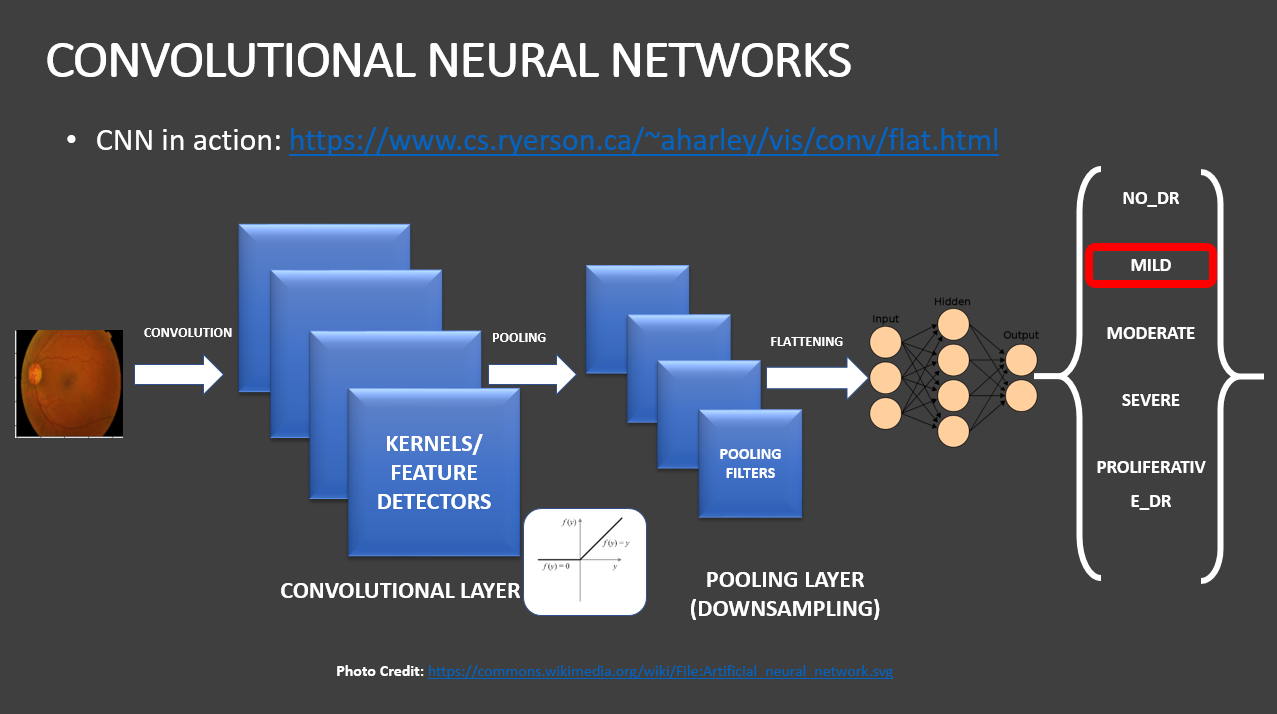

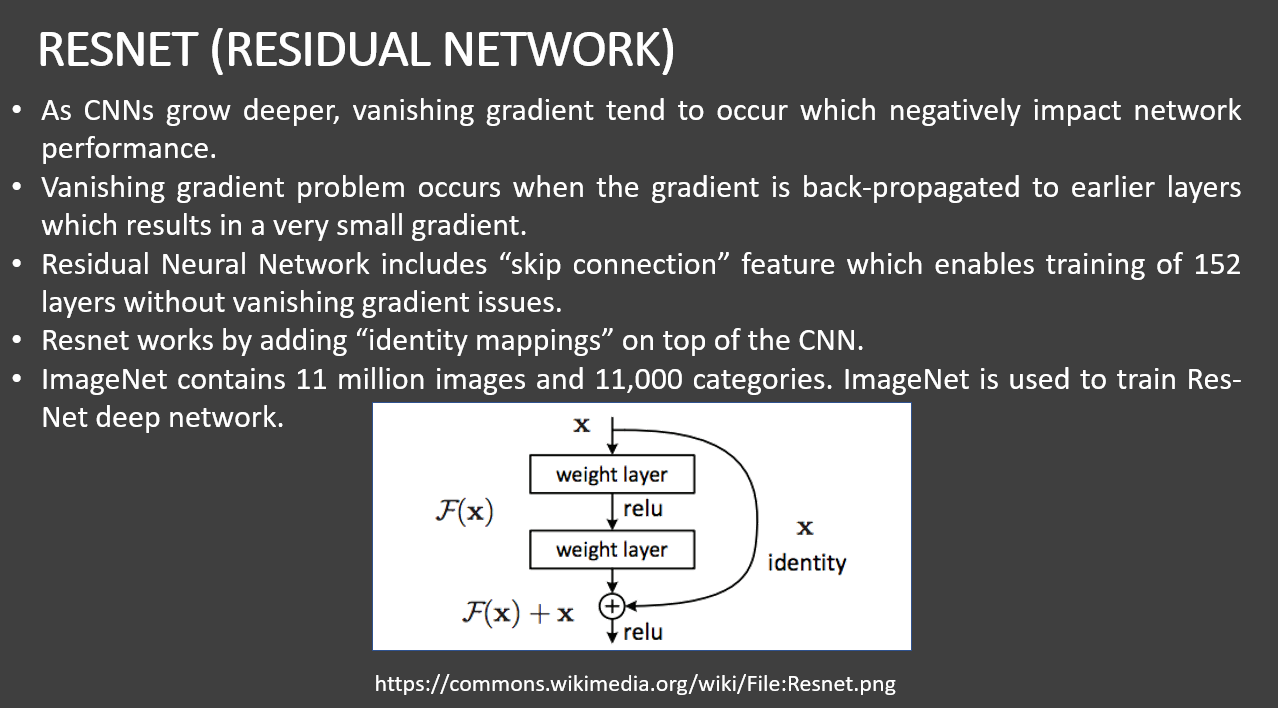

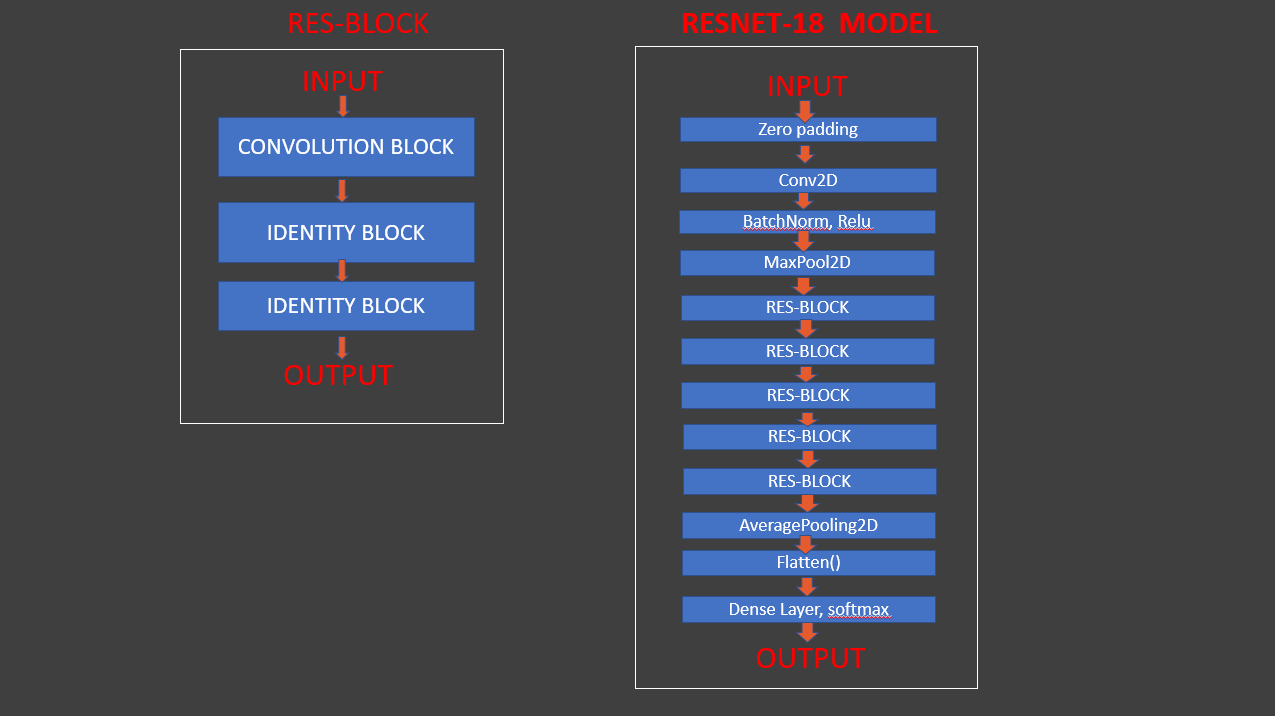

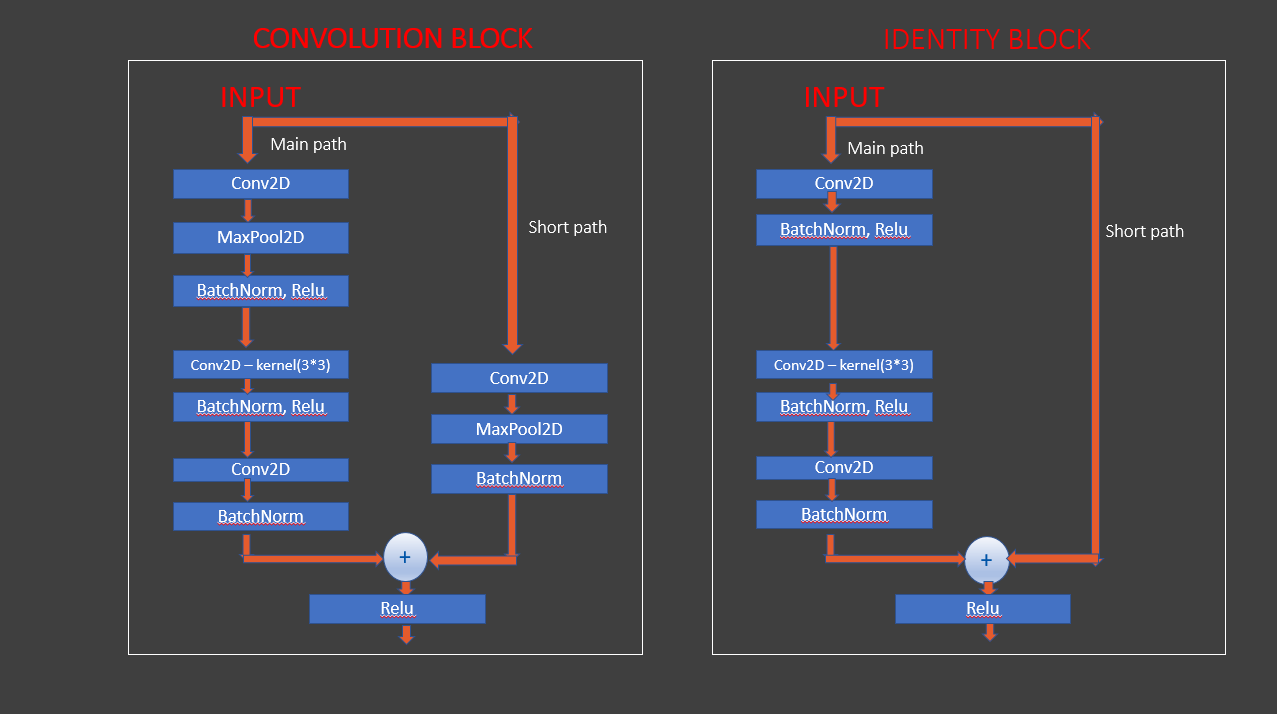

MINI CHALLENGE #4:
- What is the performance of ResNets on the ImageNet datasets? (External Research is required)

# TASK #6: BUILD RES-BLOCK BASED DEEP LEARNING MODEL

In [15]:
def res_block(X, filter, stage):
  
  # Convolutional_block
  X_copy = X

  f1 , f2, f3 = filter
    
  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_conv_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = MaxPool2D((2,2))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_conv_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_c')(X)


  # Short path
  X_copy = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_copy', kernel_initializer= glorot_uniform(seed = 0))(X_copy)
  X_copy = MaxPool2D((2,2))(X_copy)
  X_copy = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_copy')(X_copy)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Identity Block 1
  X_copy = X


  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_1_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_1_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_1_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_c')(X)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Identity Block 2
  X_copy = X


  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_2_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_2_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_2_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_c')(X)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  return X

In [16]:

input_shape = (256,256,3)

#Input tensor shape
X_input = Input(input_shape)

#Zero-padding

X = ZeroPadding2D((3,3))(X_input)

# 1 - stage

X = Conv2D(64, (7,7), strides= (2,2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3,3), strides= (2,2))(X)

# 2- stage

X = res_block(X, filter= [64,64,256], stage= 2)

# 3- stage

X = res_block(X, filter= [128,128,512], stage= 3)

# 4- stage

X = res_block(X, filter= [256,256,1024], stage= 4)

# # 5- stage

# X = res_block(X, filter= [512,512,2048], stage= 5)

#Average Pooling

X = AveragePooling2D((2,2), name = 'Averagea_Pooling')(X)

#Final layer

X = Flatten()(X)
X = Dense(5, activation = 'softmax', name = 'Dense_final', kernel_initializer= glorot_uniform(seed=0))(X)


model = Model( inputs= X_input, outputs = X, name = 'Resnet18')

model.summary()

Model: "Resnet18"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 262, 262,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1 (Conv2D)      │ (None, 128, 128,  │      9,472 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_conv1            │ (None, 128, 128,  │        256 │ conv1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 128, 128,  │          0 │ bn_conv1[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 63, 63,    │          0 │ activation[0][0]  │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res_2_conv_a        │ (None, 63, 63,    │      4,160 │ max_pooling2d[0]… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 31, 31,    │          0 │ res_2_conv_a[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_2_conv_a         │ (None, 31, 31,    │        256 │ max_pooling2d_1[… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 31, 31,    │          0 │ bn_2_conv_a[0][0] │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res_2_conv_b        │ (None, 31, 31,    │     36,928 │ activation_1[0][… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_2_conv_b         │ (None, 31, 31,    │        256 │ res_2_conv_b[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 31, 31,    │          0 │ bn_2_conv_b[0][0] │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res_2_conv_copy     │ (None, 63, 63,    │     16,640 │ max_pooling2d[0]… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res_2_conv_c        │ (None, 31, 31,    │     16,640 │ activation_2[0][… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 31, 31,    │          0 │ res_2_conv_copy[… │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_2_conv_c         │ (None, 31, 31,    │      1,024 │ res_2_conv_c[0][

 Total params: 4,987,525 (19.03 MB)

 Trainable params: 4,967,685 (18.95 MB)

 Non-trainable params: 19,840 (77.50 KB)

# TASK #7: COMPILE AND TRAIN DEEP LEARNING MODEL

In [17]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics= ['accuracy'])


In [24]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Using early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

# Save only the weights of the best model with lower validation loss
checkpointer = ModelCheckpoint(filepath="weights.weights.h5", verbose=1, save_best_only=True, save_weights_only=True)









In [25]:
history = model.fit(train_generator, steps_per_epoch = train_generator.n // 32, epochs = 100, validation_data= validation_generator, validation_steps= validation_generator.n // 32, callbacks=[checkpointer , earlystopping])

Epoch 1/100


c:\Users\IDREES AHMAD\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.6052 - loss: 2.3202
Epoch 1: val_loss improved from inf to 1.04424, saving model to weights.weights.h5
71/71 ━━━━━━━━━━━━━━━━━━━━ 426s 5s/step - accuracy: 0.6059 - loss: 2.3109 - val_accuracy: 0.7422 - val_loss: 1.0442
Epoch 2/100
 1/71 ━━━━━━━━━━━━━━━━━━━━ 4:52 4s/step - accuracy: 0.8438 - loss: 0.6616

c:\Users\IDREES AHMAD\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)



Epoch 2: val_loss improved from 1.04424 to 0.99710, saving model to weights.weights.h5
71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.8438 - loss: 0.6616 - val_accuracy: 0.7778 - val_loss: 0.9971
Epoch 3/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.7051 - loss: 0.9567
Epoch 3: val_loss improved from 0.99710 to 0.93898, saving model to weights.weights.h5
71/71 ━━━━━━━━━━━━━━━━━━━━ 363s 5s/step - accuracy: 0.7052 - loss: 0.9563 - val_accuracy: 0.7396 - val_loss: 0.9390
Epoch 4/100
 1/71 ━━━━━━━━━━━━━━━━━━━━ 5:22 5s/step - accuracy: 0.6562 - loss: 0.9859
Epoch 4: val_loss improved from 0.93898 to 0.87857, saving model to weights.weights.h5
71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.6562 - loss: 0.9859 - val_accuracy: 0.8333 - val_loss: 0.8786
Epoch 5/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7210 - loss: 0.8971
Epoch 5: val_loss did not improve from 0.87857
71/71 ━━━━━━━━━━━━━━━━━━━━ 340s 5s/step - accuracy: 0.7209 - loss: 0.8974 - val_accuracy:

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()


In [27]:
model.save('CNN_model.hdf5')

In [28]:
model.save('CNN_model.keras')

In [29]:
model.save_own_variables

<bound method Layer.save_own_variables of <Functional name=Resnet18, built=True>>

In [30]:
model.compute_output_shape

<bound method Functional.compute_output_shape of <Functional name=Resnet18, built=True>>

In [31]:
model.compiled_loss

<bound method TensorFlowTrainer.compiled_loss of <Functional name=Resnet18, built=True>>

# TASK #8: ASSESS THE PERFORMANCE OF THE TRAINED MODEL

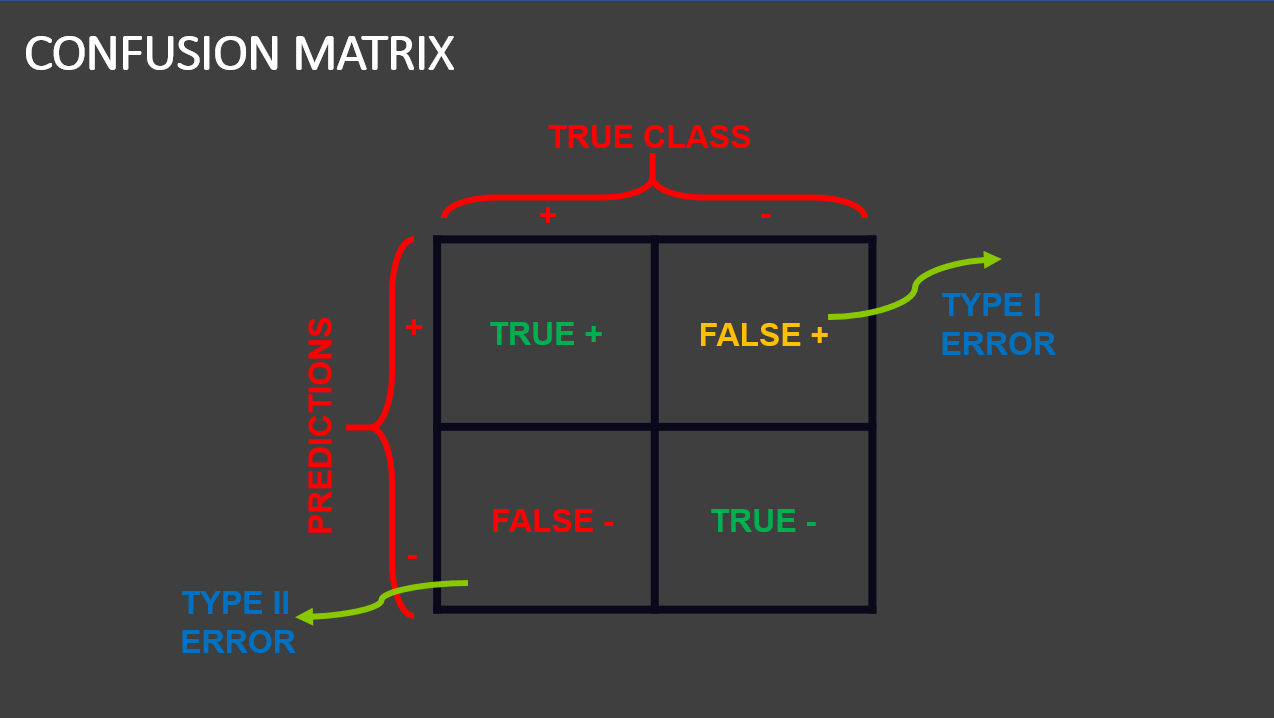

In [37]:
model.load_weights("CNN_model.hdf5")

In [38]:
# Evaluate the performance of the model
evaluate = model.evaluate(test_generator, steps = test_generator.n // 32, verbose =1)

print('Accuracy Test : {}'.format(evaluate[1]))

20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.7482 - loss: 0.8811
Accuracy Test : 0.7359374761581421


In [39]:
# Assigning label names to the corresponding indexes
labels = {0: 'Mild', 1: 'Moderate', 2: 'No_DR', 3:'Proliferate_DR', 4: 'Severe'}

In [ ]:
# Loading images and their predictions 

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# import cv2

prediction = []
original = []
image = []
count = 0

for item in range(len(test)):
  # code to open the image
  img= PIL.Image.open(test['Image'].tolist()[item])
  # resizing the image to (256,256)
  img = img.resize((256,256))
  # appending image to the image list
  image.append(img)
  # converting image to array
  img = np.asarray(img, dtype= np.float32)
  # normalizing the image
  img = img / 255
  # reshaping the image in to a 4D array
  img = img.reshape(-1,256,256,3)
  # making prediction of the model
  predict = model.predict(img)
  # getting the index corresponding to the highest value in the prediction
  predict = np.argmax(predict)
  # appending the predicted class to the list
  prediction.append(labels[predict])
  # appending original class to the list
  original.append(test['Labels'].tolist()[item])


In [41]:
# Getting the test accuracy 
score = accuracy_score(original, prediction)
print("Test Accuracy : {}".format(score))

Test Accuracy : 0.7328358208955223


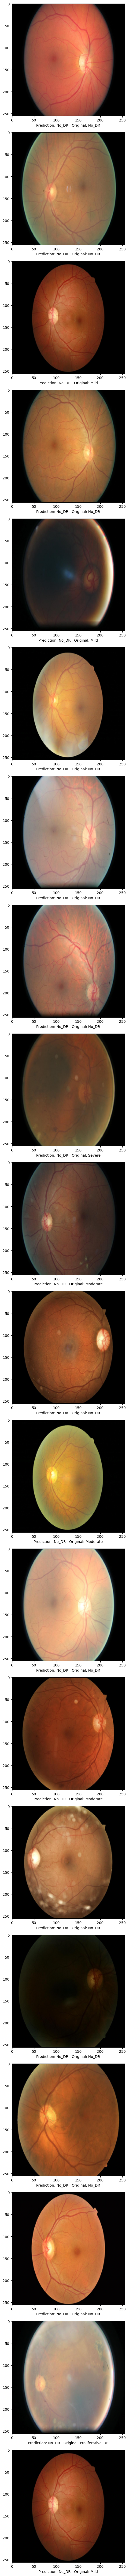

In [42]:
# Visualizing the results
import random
fig=plt.figure(figsize = (100,100))
for i in range(20):
    j = random.randint(0,len(image))
    fig.add_subplot(20, 1, i+1)
    plt.xlabel("Prediction: " + prediction[j] +"   Original: " + original[j])
    plt.imshow(image[j])
fig.tight_layout()
plt.show()

MINI CHALLENGE #6: 
 - print out the classification report 
 - print out the confusion matrix and comment on the model performance


# GREAT JOB!

MINI CHALLENGE #1 SOLUTION: 
- Print out the count plot for all classes using Seaborn (External Research is Required)


In [1]:
import seaborn as sns
sns.countplot(label)

ModuleNotFoundError: No module named 'seaborn'

MINI CHALLENGE #2 SOLUTION: 
- Plot a pie chart showing the percentage of samples per class. 

<function matplotlib.pyplot.show(close=None, block=None)>

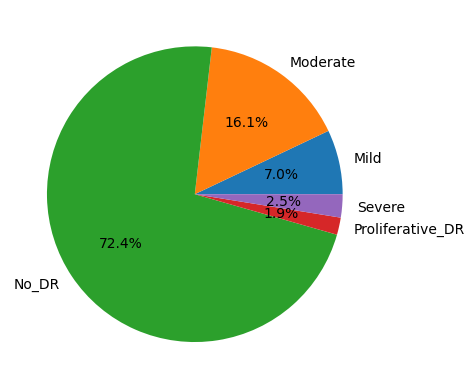

In [45]:
No_images_per_class
Class_name
fig1, ax1 = plt.subplots()
ax1.pie(No_images_per_class, labels = Class_name, autopct = '%1.1f%%')
plt.show

In [46]:
# Print out the classification report
print(classification_report(np.asarray(original), np.asarray(prediction)))


                  precision    recall  f1-score   support

            Mild       0.00      0.00      0.00        49
        Moderate       0.00      0.00      0.00        99
           No_DR       0.73      1.00      0.85       492
Proliferative_DR       0.00      0.00      0.00        11
          Severe       0.00      0.00      0.00        19

        accuracy                           0.73       670
       macro avg       0.15      0.20      0.17       670
    weighted avg       0.54      0.73      0.62       670



c:\Users\IDREES AHMAD\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\IDREES AHMAD\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\IDREES AHMAD\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [3]:
pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 187.9 kB/s eta 0:00:02
   ---- ---------------------------------- 30.7/294.9 kB 187.9 kB/s eta 0:00:02
   -------- ------------------------------ 61.4/294.9 kB 233.8 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/294.9 kB 308.0 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/294.9 kB 343.4 kB/s eta 0:00:01
   ---------------------- --------------- 174.1/294.9 kB 436.9 kB/s eta 0:00:01
   -------------------------- ----------- 204.8/294.9 kB 461.0 kB/s eta 0:00:01
   ------------------------------- ------ 245.8/294.9 kB 486.6 kB/s eta 0:00:01
   -------------------------------------- 294.9/294.9 kB 551.7 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
# plot the confusion matrix
plt.figure(figsize = (20,20))
cm = confusion_matrix(np.asarray(original), np.asarray(prediction))
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Original')
ax.set_title('Confusion_matrix')


Passing an image 

In [2]:
from keras.models import load_model
import numpy as np
from PIL import Image

# Load the entire model with architecture and weights
model = load_model('CNN_model.hdf5')

def preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.resize((256, 256))  # Adjust based on your model input size
    image = np.array(image) / 255.0   # Normalize the image
    image = np.expand_dims(image, axis=0)
    return image

# Path to the image
image_path = 'train/Mild/114_left.png'
preprocessed_image = preprocess_image(image_path)

# Make a prediction
predictions = model.predict(preprocessed_image)

# Print the predictions
print(predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.039174   0.05309401 0.8900788  0.00381514 0.0138381 ]]


In [ ]:
import tensorflow as tf

# Convert the model
model = tf.keras.models.load_model('weights.hdf5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)


In [5]:
import tensorflow as tf

# Load your model
model = tf.keras.models.load_model('weights.hdf5')

# Export the model as a SavedModel
model.export('saved_model/my_model')


INFO:tensorflow:Assets written to: saved_model/my_model\assets


INFO:tensorflow:Assets written to: saved_model/my_model\assets


Saved artifact at 'saved_model/my_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='input_1')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  2623827746192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2623874724880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2623874722768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2623749832976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2623874727760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2623874723344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2623749833744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2623749835856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2623749833936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2623749835280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2623749833552: TensorSpec(shape=(),

In [6]:
import tensorflow as tf

# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model('saved_model/my_model')
tflite_model = converter.convert()

# Save the TFLite model
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)


In [1]:
import tensorflow as tf
import numpy as np
from PIL import Image

# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="model.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Load an image from the train/Mild folder
image_path = 'train/Mild/10030_left.png'
image = Image.open(image_path).resize((256, 256))
image = np.array(image, dtype=np.float32)
image = np.expand_dims(image, axis=0)

# Preprocess the image to match the input shape of the model
image = image / 255.0

# Set the tensor to point to the input data to be inferred
interpreter.set_tensor(input_details[0]['index'], image)

# Run the inference
interpreter.invoke()

# Extract the output data from the interpreter
output_data = interpreter.get_tensor(output_details[0]['index'])

# Print the predictions
print("Predictions for the image:", output_data)


Predictions for the image: [[0.07662211 0.23427102 0.6510651  0.00854085 0.02950099]]


In [2]:
print(input_details)

[{'name': 'serving_default_input_1:0', 'index': 0, 'shape': array([  1, 256, 256,   3]), 'shape_signature': array([ -1, 256, 256,   3]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [3]:
print(output_details)

[{'name': 'StatefulPartitionedCall_1:0', 'index': 142, 'shape': array([1, 5]), 'shape_signature': array([-1,  5]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
